# Sarvesh Vikas Tikekar (2022120037)

## Graph based Clustering Implementation (CSL701- Machine Learning AY: 2025-2026)

**Zachary's Karate Club Dataset**

The Zachary's Karate Club dataset is a classic social network dataset used in network analysis and community detection. It comes from a study conducted in the 1970s by Wayne W. Zachary. The dataset captures the social relationships between 34 members of a karate club at a U.S. university.

**The dataset is often represented as a graph:**

1. **Nodes** = club members (34 in total)

2. **Edges** = social interactions between members (friendships, frequent contacts)

**Purpose**

Zachary collected data to understand how the club members interacted and what would happen if the club split. During the observation period, a disagreement between the club instructor and the club administrator actually caused the club to split into two groups.

This makes the dataset ideal for testing community detection algorithms because the “ground truth” split is known: members divided into two factions.

**Features / Structure**

The dataset doesn’t have traditional features like age, salary, etc. Instead, it’s network-structured, focusing on relationships:

1. **Nodes** (Members):
34 members, usually labeled 1–34.
Node labels sometimes correspond to real-life names (anonymized in many versions).

2. **Edges** (Connections)
Each edge represents a friendship or social tie.

Can be represented in:

Adjacency matrix (34×34) where 1 = connection exists, 0 = no connection.

Edge list (pairs of members who are connected).

3. **Ground-truth groups**

After the split:

Faction 1 → follows the instructor

Faction 2 → follows the administrator

This “true community assignment” is often used to validate community detection algorithms.

**Applications**

Zachary’s Karate Club dataset is widely used for:

1. Community detection: Widely used to benchmark algorithms like Girvan–Newman and Louvain.

2. Graph theory education: Helps explain concepts like modularity and centrality.

3. Visualization: Provides clear examples for network diagrams and community structure demonstrations.



In [15]:
!pip3 install plotly

In [17]:
#Importing all libraries and dataset from networkx

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score
import plotly.express as px

G = nx.karate_club_graph()

**Calculating the Basic Statisticss**

1. **Number of nodes** → Represents the total members in the karate club network.

2. **Number of edges** → Represents the total friendships or connections between members.

3. **Average degree** → Represents the average number of friends per member.

4. **Density** → Represents how connected the network is compared to a fully connected network.

In [2]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)

print(f"Number of nodes in graph: {num_nodes}")
print(f"Number of edges in graph: {num_edges}")
print(f"Average edge degree: {avg_degree:.2f}")
print(f"Density: {density:.4f}")

Number of nodes in graph: 34
Number of edges in graph: 78
Average edge degree: 4.59
Density: 0.1390


As average degree is approximately 5, hence each member on average has 5 friends

**Visualization of the Data via a Graph**

The following are observed:
1. The structure of the social network—who is connected to whom.

2. You can often visually see clusters or groups, which correspond to members who are more closely connected.

3. This reflects the real-life social structure of the club before it split into two factions.

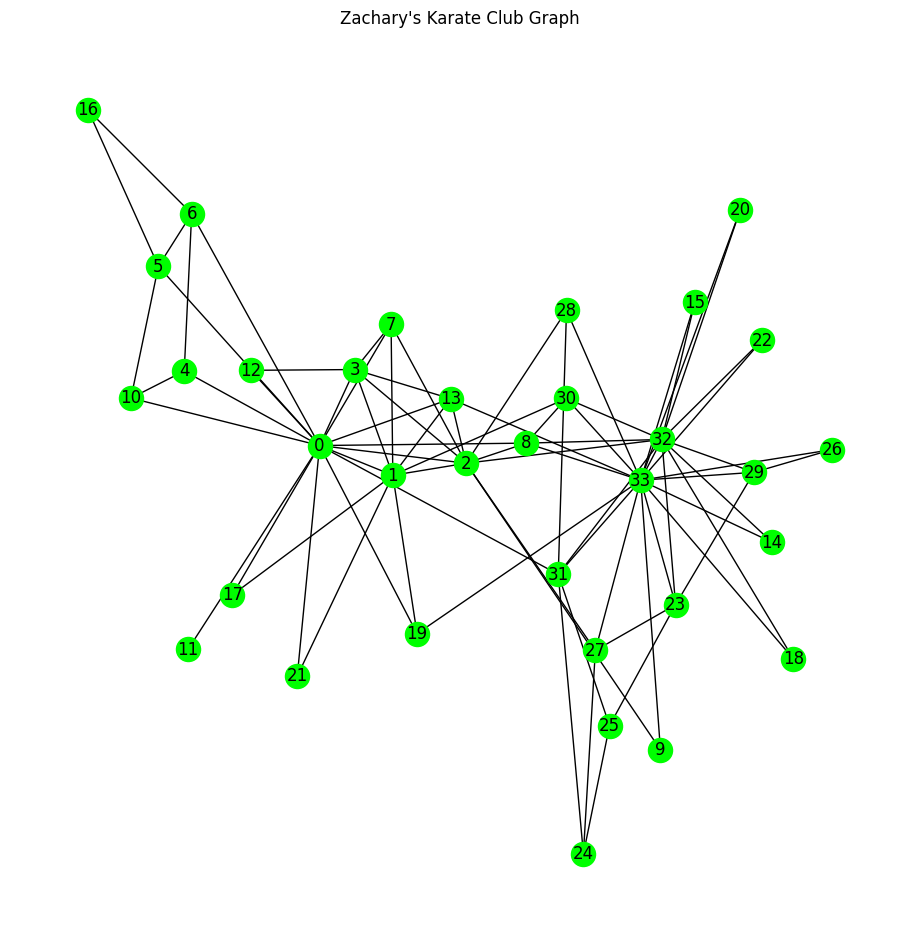

In [10]:
plt.figure(figsize=(9, 9))
nx.draw(G, with_labels=True, node_color='lime', edge_color='black')
plt.title("Zachary's Karate Club Graph")
plt.show()

**Analyzing Node Degrees**

**Node with the highest degree** → The member with the most connections likely represents a central or influential figure in the club.

**Node with the lowest degree** → The member with the fewest connections might be more isolated or less socially active.

**Average node degree** → Provides an idea of how connected a typical member is within the network.

**Overall insight:** The above metrics primarily help us to identify influential members and understand the overall connectivity patterns in the club’s social network.

In [11]:
degrees = dict(G.degree())

# Node with the highest degree
max_degree_node = max(degrees, key=lambda k: degrees[k])
print(f"Node with the highest degree: {max_degree_node} (degree: {degrees[max_degree_node]})")

# Node with the lowest degree
min_degree_node = min(degrees, key=lambda k: degrees[k])
print(f"Node with the lowest degree: {min_degree_node} (degree: {degrees[min_degree_node]})")

# Average node degree (already calculated in a previous cell, but recalculating for completeness)
average_degree = sum(degrees.values()) / len(degrees)
print(f"Average node degree: {average_degree:.2f}")

Node with the highest degree: 33 (degree: 17)
Node with the lowest degree: 11 (degree: 1)
Average node degree: 4.59


Hence, node 33 has the highest degree or influencing power, which is also evident from the above graph

**Examining Clustering Properties**

**Triangles**

A triangle in this network means three people are all friends with each other.

Counting triangles helps us understand tight-knit groups in the club.

For example, if nodes 1, 2, and 3 form a triangle, it indicates that these three members are strongly connected.

**Clustering Coefficient**

The clustering coefficient measures how likely it is that a member’s friends are also friends with each other.

A high coefficient for a node → that member is part of a tightly knit group.

nx.average_clustering(G) gives the overall tendency of the club to form such

In [12]:
num_triangles = sum(nx.triangles(G).values()) // 3
avg_clustering_coefficient = nx.average_clustering(G)

print(f"Number of triangles: {num_triangles}")
print(f"Average clustering coefficient: {avg_clustering_coefficient:.4f}")

Number of triangles: 45
Average clustering coefficient: 0.5706


**Investigating the Shortest Paths**

**Diameter:** The diameter is the longest shortest path between any two nodes in the network.

**Average Shortest Path length:** This is the average number of steps along the shortest paths for all pairs of nodes.

These metrics are useful in helping us get insights about the global network connectivity.

In [13]:
# Calculate diameter
diameter = nx.diameter(G)
print(f"Diameter of the graph: {diameter}")

# Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")

Diameter of the graph: 5
Average shortest path length: 2.41


**Plotting the Distribution based on Degrees and Number of Nodes**

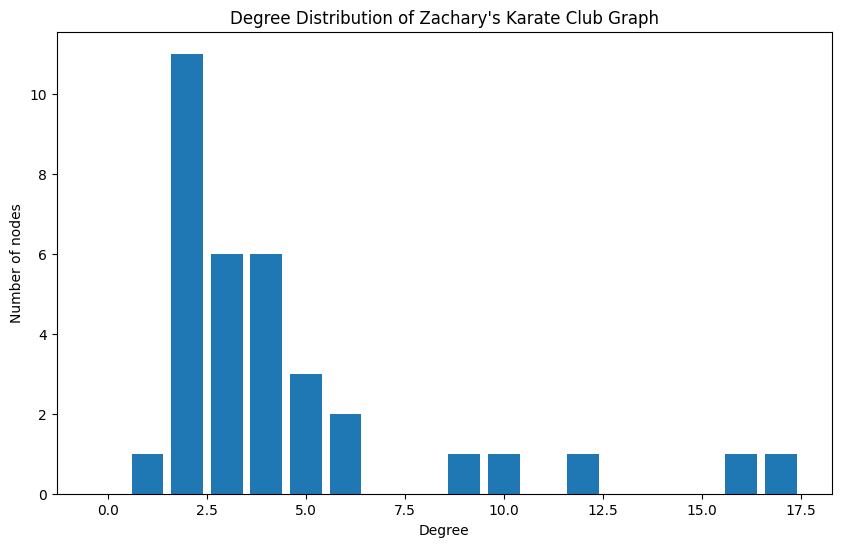

In [24]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# Corrected: Create a dictionary from the degree histogram
degree_counts = {i: count for i, count in enumerate(nx.degree_histogram(G))}

plt.figure(figsize=(10, 6))
# px.bar(x=list(degree_counts.keys()), y=list(degree_counts.values()))
plt.bar(list(degree_counts.keys()), list(degree_counts.values()))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution of Zachary's Karate Club Graph")
plt.show()

**Spectral Clustering**

Spectral Clustering is a variant of the clustering algorithm that uses the connectivity between the data points to form the clustering. It uses eigenvalues and eigenvectors of the data matrix to forecast the data into lower dimensions space to cluster the data points. It is based on the idea of a graph representation of data where the data points are represented as nodes and the similarity between the data points are represented by an edge.

**The Spectral Clustering Steps**

**Step 1: Data Representation**

Spectral clustering starts by representing the data as a graph, where:

Each data point becomes a node in the graph

Edges connect nodes based on similarity between data points

Edge weights represent the strength of similarity

This step transforms the problem from clustering points in space to partitioning a graph.

**Step 2: Constructing the Similarity Matrix**

Create a similarity matrix S where:

S[i,j] represents the similarity between nodes i and j

Common choices include Gaussian kernel or k-nearest neighbors

This matrix captures the connectivity between data points.

**Step 3: Normalizing the Similarity Matrix**

Compute the normalized Laplacian matrix L
sym:

L sym =D−1/2∗(D−S)∗ −1/2

Where D is the diagonal matrix of row sums of S.

This normalization helps in handling graphs with varying degrees.

**Step 4: Computing Eigenvectors**

Calculate the k smallest eigenvectors of L
sym
​
 .

These eigenvectors capture the underlying structure of the graph.

**Step 5: Forming the Feature Matrix**

Create a matrix U whose columns are the k eigenvectors computed in step 4.

Each row of U represents a data point in the new feature space.

**Step 6: Normalizing Rows of U**

Normalize each row of U to have unit length.

This step ensures all points lie on a hypersphere, which aids in clustering.

**Step 7: Applying K-Means Clustering**

Apply the K-means clustering algorithm to the rows of U.

This groups the data points into clusters based on their new feature representations.

**Step 8: Assigning Cluster Labels**

Assign cluster labels to original data points based on the K-means clustering result.

Each node in the graph gets assigned to a cluster.

**Step 9: Evaluating Clustering Quality**

Evaluate the quality of the clustering using metrics like silhouette score or adjusted Rand index.

This helps in assessing how well the algorithm performed.

**Key Points to Consider:**

1. Spectral clustering is particularly effective for datasets that form clusters with complex shapes.

2. The choice of k (number of clusters) is crucial and often requires domain knowledge or experimentation.

3. Spectral clustering can handle high-dimensional data effectively by projecting onto lower dimensions.

**Converting the Graph to an Adjacency Matrix**

In [25]:
adjacency_matrix = nx.adjacency_matrix(G)
print(adjacency_matrix.todense())

[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


**Applying Spectral Clustering and getting the Cluster Labels**

In [26]:
from sklearn.cluster import SpectralClustering

# Convert the sparse adjacency matrix to a dense array
adjacency_matrix_dense = adjacency_matrix.todense()

# Apply Spectral Clustering
# We'll choose 2 clusters as the Karate Club graph is known to have two main communities
spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='discretize', random_state=42)
labels = spectral_clustering.fit_predict(adjacency_matrix_dense)

# Print the cluster labels for each node
print("Spectral Clustering Labels:")
for i, label in enumerate(labels):
    print(f"Node {i}: Cluster {label}")

Spectral Clustering Labels:
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 1
Node 9: Cluster 1
Node 10: Cluster 0
Node 11: Cluster 0
Node 12: Cluster 0
Node 13: Cluster 0
Node 14: Cluster 1
Node 15: Cluster 1
Node 16: Cluster 0
Node 17: Cluster 0
Node 18: Cluster 1
Node 19: Cluster 0
Node 20: Cluster 1
Node 21: Cluster 0
Node 22: Cluster 1
Node 23: Cluster 1
Node 24: Cluster 1
Node 25: Cluster 1
Node 26: Cluster 1
Node 27: Cluster 1
Node 28: Cluster 1
Node 29: Cluster 1
Node 30: Cluster 1
Node 31: Cluster 1
Node 32: Cluster 1
Node 33: Cluster 1


**Evaluating the Clustering Performance**

**Ground Truth Comparision**

Ground Truth is the actual split of the club into two factions after a conflict. It can be used to compare our results against the Ground Truth.

The Adjusted Rand Index (ARI) Measures the similarity between two clusterings, adjusted for chance. An ARI Score close to 1 Indicates excellent agreement between our clustering and the ground truth

In [27]:
# Ground truth community assignments for Zachary's Karate Club graph
# These are based on the actual split of the club
ground_truth = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Calculate Adjusted Rand Index (ARI) to compare the clustering results with the ground truth
ari_score = adjusted_rand_score(ground_truth, labels)

print(f"Adjusted Rand Index (ARI) score: {ari_score:.4f}")

Adjusted Rand Index (ARI) score: 1.0000


**Modularity Calculation**

Modularity is a measure of the strength of division of a network into communities (or modules). A community is a group of nodes that are more densely connected to each other than to the rest of the network.

In simpler words, modularity tells us how well a network is split into clusters. Higher modularity means the network has strongly defined communities.

In [28]:
# Modularity calculation requires communities as sets of nodes
# Convert the labels array to a list of sets representing communities
communities = {}
for i, label in enumerate(labels):
    if label not in communities:
        communities[label] = set()
    communities[label].add(i)

community_list = list(communities.values())

# Calculate and print the modularity
modularity = nx.community.modularity(G, community_list)
print(f"Modularity of the spectral clustering: {modularity:}")

Modularity of the spectral clustering: 0.40362811791383213


**Visualization of the Graph with Clusters**

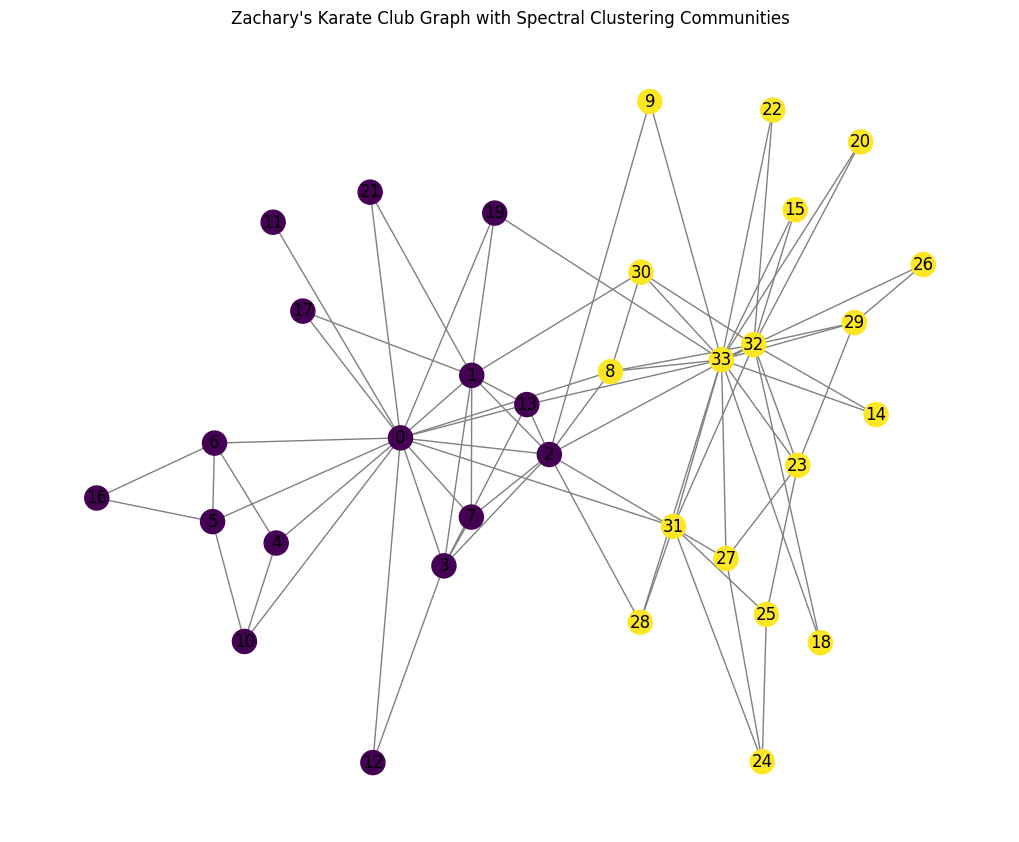

In [29]:
# Create a list of colors based on the cluster labels
node_colors = [labels[i] for i in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, edge_color='gray')
plt.title("Zachary's Karate Club Graph with Spectral Clustering Communities")
plt.show()

**Improving the Performance (ARI) of the Clustering**

**Applying Spectral Clustering with Optimized Paramters**

In [30]:
from sklearn.cluster import SpectralClustering

# Convert the sparse adjacency matrix to a dense array
adjacency_matrix_dense = adjacency_matrix.todense()

# Apply Spectral Clustering with optimized parameters
spectral_clustering_optimized = SpectralClustering(n_clusters=2, affinity='poly', eigen_solver='lobpcg', n_init=100, random_state=42)
labels_optimized = spectral_clustering_optimized.fit_predict(adjacency_matrix_dense)

# Print the cluster labels for each node
print("Spectral Clustering Labels (Optimized Parameters):")
for i, label in enumerate(labels_optimized):
    print(f"Node {i}: Cluster {label}")

Spectral Clustering Labels (Optimized Parameters):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 1
Node 9: Cluster 1
Node 10: Cluster 0
Node 11: Cluster 0
Node 12: Cluster 0
Node 13: Cluster 0
Node 14: Cluster 1
Node 15: Cluster 1
Node 16: Cluster 0
Node 17: Cluster 0
Node 18: Cluster 1
Node 19: Cluster 0
Node 20: Cluster 1
Node 21: Cluster 0
Node 22: Cluster 1
Node 23: Cluster 1
Node 24: Cluster 1
Node 25: Cluster 1
Node 26: Cluster 1
Node 27: Cluster 1
Node 28: Cluster 1
Node 29: Cluster 1
Node 30: Cluster 1
Node 31: Cluster 1
Node 32: Cluster 1
Node 33: Cluster 1


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_spectral.py:703: UserWarning:

The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.



**Community Detection Overview**

**Goal:** Partition the graph into communities (clusters) such that nodes within the same community are highly interconnected, while connections between communities are sparser.

**Applications:** Social networks (friend groups), biological networks (protein interactions), recommendation systems, etc.

**Metrics:** A common measure is modularity, which quantifies the strength of community structure. Higher modularity → stronger community separation.

**Alpha Parameter in Community Detection**

The alpha parameter is typically associated with resolution parameters in community detection methods such as Louvain or Leiden algorithms.

**What it does:**

It controls the size of communities you detect.

High alpha → smaller communities,

low alpha → larger communities.

**How it works:**

Many modularity-based algorithms optimize a function like:

𝑄 =∑𝑐[(edges within community c)−𝛼⋅(expected edges in c)]

Here,
α tunes how strongly the algorithm favors splitting into smaller groups.

**Intuition:**
Imagine you have a social network. If alpha is high, even weakly connected subgroups might be considered separate communities. If alpha is low, the algorithm prefers bigger, coarser communities.

**Greedy Algorithm for Community Detection**

The Greedy algorithm is a simple and efficient approach, often called Greedy Modularity Maximization.

**Idea:**
Iteratively merge communities to maximize modularity.

**Steps:**

1. Start with each node as its own community.

2. Compute the modularity gain for merging every pair of communities.

3. Merge the pair that gives the largest increase in modularity.

4. Repeat until no merge increases modularity.

**Pros:**

1. Simple and fast for small to medium networks.

2. Often gives a good approximation of community structure.

**Cons:**

1. Can get stuck in local maxima (not guaranteed optimal).

2. Not ideal for very large networks unless optimized variants are used.

In [31]:
import networkx.algorithms.community as community

# Asynchronous Label Propagation
lp_communities_generator = community.asyn_lpa_communities(G)
lp_communities = list(lp_communities_generator)

# Convert communities to a list of labels for ARI calculation
lp_labels = [-1] * G.number_of_nodes()
for i, nodes in enumerate(lp_communities):
    for node in nodes:
        lp_labels[node] = i

# Calculate ARI for Label Propagation
ari_lp = adjusted_rand_score(ground_truth, lp_labels)
print(f"Adjusted Rand Index (ARI) for Asynchronous Label Propagation: {ari_lp:}")

# Greedy Modularity Maximization
greedy_communities_generator = community.greedy_modularity_communities(G)
greedy_communities = list(greedy_communities_generator)

# Convert communities to a list of labels for ARI calculation
greedy_labels = [-1] * G.number_of_nodes()
for i, nodes in enumerate(greedy_communities):
    for node in nodes:
        greedy_labels[node] = i

# Calculate ARI for Greedy Modularity Maximization
ari_greedy = adjusted_rand_score(ground_truth, greedy_labels)
print(f"Adjusted Rand Index (ARI) for Greedy Modularity Maximization: {ari_greedy:}")

Adjusted Rand Index (ARI) for Asynchronous Label Propagation: 0.44260687294475104
Adjusted Rand Index (ARI) for Greedy Modularity Maximization: 0.6802559028644983


**Viusalzing all of the Graphs with Clusters**

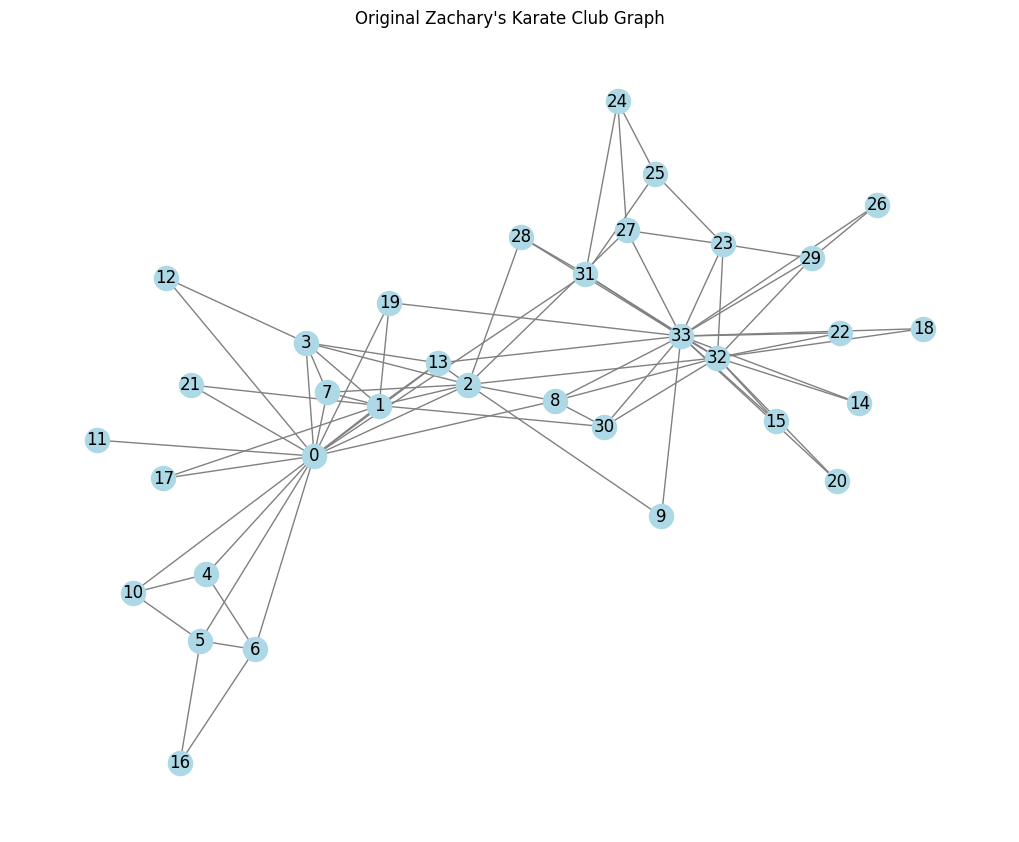

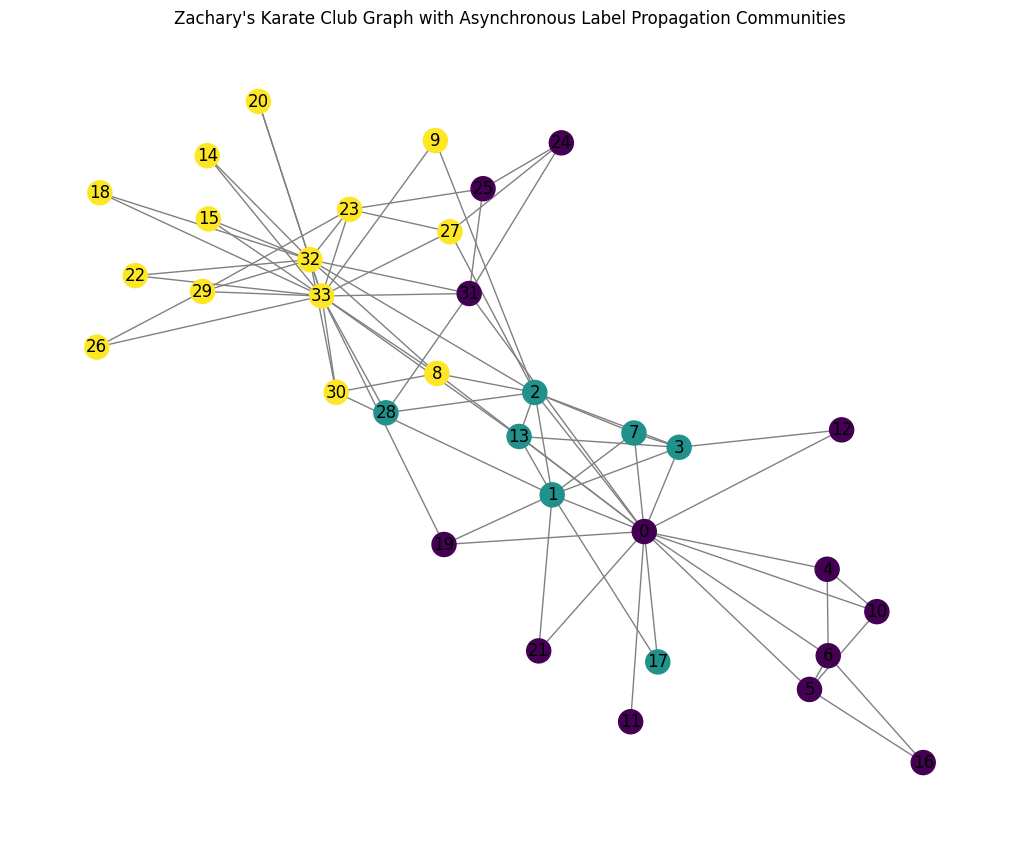

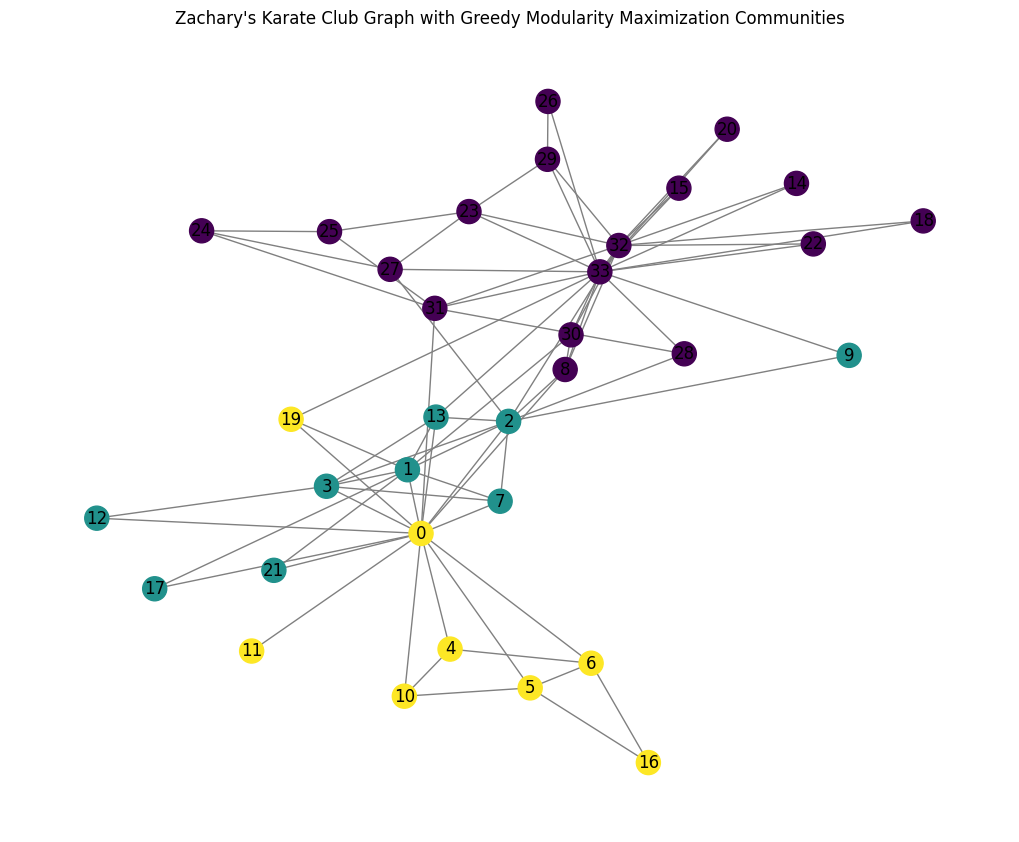

In [32]:
# Visualize the original graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Zachary's Karate Club Graph")
plt.show()

# Visualize the graph with Asynchronous Label Propagation communities
# Create a list of colors based on the lp community labels
node_colors_lp = [lp_labels[i] for i in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=node_colors_lp, cmap=plt.cm.viridis, edge_color='gray')
plt.title("Zachary's Karate Club Graph with Asynchronous Label Propagation Communities")
plt.show()

# Visualize the graph with Greedy Modularity Maximization communities
# Create a list of colors based on the greedy community labels
node_colors_greedy = [greedy_labels[i] for i in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=node_colors_greedy, cmap=plt.cm.viridis, edge_color='gray')
plt.title("Zachary's Karate Club Graph with Greedy Modularity Maximization Communities")
plt.show()

As Visible by the Graphs, the ARI has been Improved by making use of the Community Detection Algorithms that are specifically designed for Networks